### Imports

In [1]:
%matplotlib notebook

In [2]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [14]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle
import nmrglue

### Data

In [4]:
data_path = 'data/silan/pmg166_3rdseries_full.csv'

In [5]:
data = pd.read_csv(data_path, sep = ',')

In [6]:
data.shape

(131072, 91)

In [7]:
data.columns = ['ppm']+['t'+str(i) for i in range(90)]

In [8]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [9]:
sp0 = load_spectrum(data, 0)
sp89 = load_spectrum(data, 89)

<IPython.core.display.Javascript object>


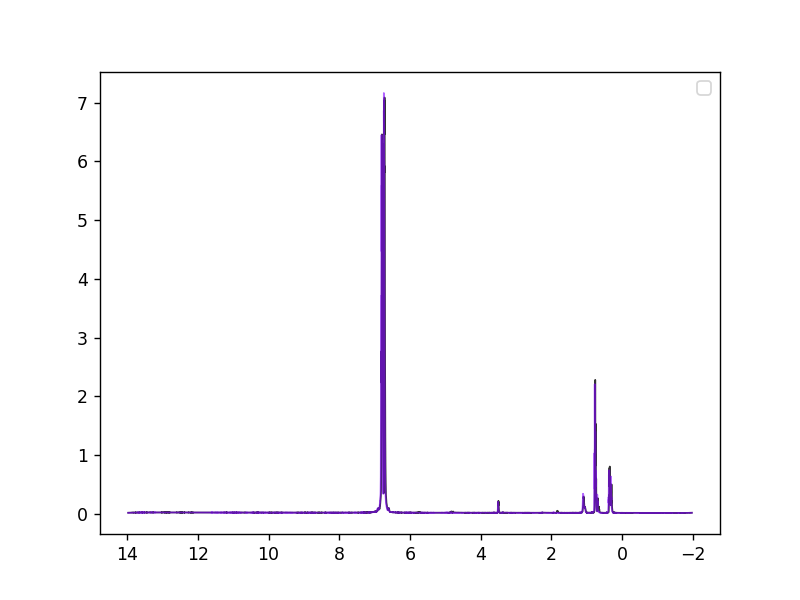

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [10]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp0, sp89], profile=True)

In [11]:
def cut_spectra_to_region(list_of_spectra, lower_bound, upper_bound):
    res = []
    for sp in list_of_spectra:
        ppm = np.array(sp.confs)[:,0]
        ints = np.array(sp.confs)[:,1]
        ppm_in_region = np.logical_and(ppm>lower_bound, ppm<upper_bound)
        new_ppm = ppm[ppm_in_region]
        new_ints = ints[ppm_in_region]
        res.append(NMRSpectrum(confs=list(zip(new_ppm, new_ints))))
    return res

In [12]:
preprocessed_spectra = [load_spectrum(data, i) for i in range(90)]
preprocessed_spectra = cut_spectra_to_region(preprocessed_spectra, 0, 8)

In [12]:
# plt.gca().invert_xaxis()
# NMRSpectrum.plot_all([preprocessed_spectra[0], preprocessed_spectra[89]], profile=True)

### Loading simulated spectra

In [13]:
components_names = ['1-hexene', 'triethylsilane', 'triethelo-1-hexylosilane']

In [17]:
spectra = []
for i, name in enumerate(components_names):
    spectrum_dict, intensities = nmrglue.jcampdx.read(os.getcwd()+'/data/silan/' + name + '.jdx')
    
    start = float(spectrum_dict['FIRSTX'][0])
    stop = float(spectrum_dict['LASTX'][0])
    num = int(spectrum_dict['NPOINTS'][0])

    ppm_axis = np.linspace(start=start, stop=stop, num=num)
    
    sp = NMRSpectrum(confs=list(zip(ppm_axis, intensities)))
    sp.normalize()
    spectra.append(sp)

In [21]:
sp0.normalize()

<IPython.core.display.Javascript object>


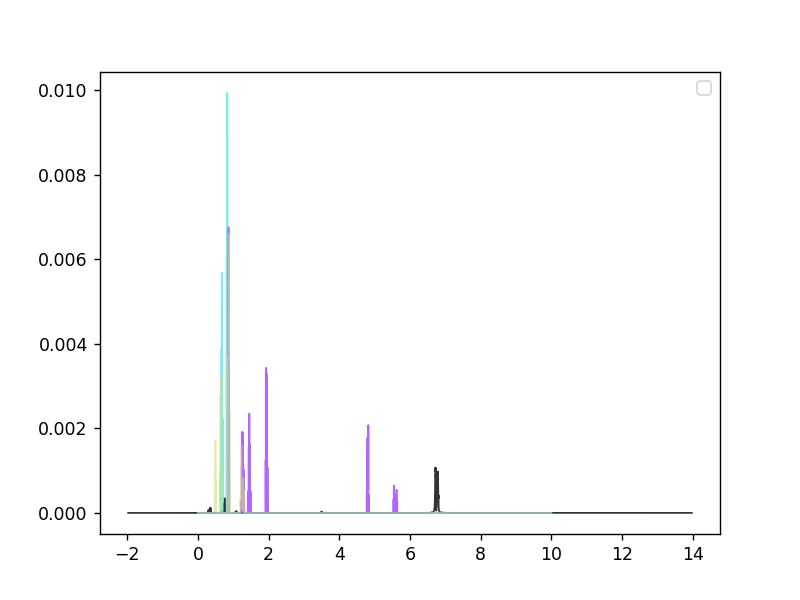

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [23]:
NMRSpectrum.plot_all([sp0]+spectra, profile=True)